<a href="https://colab.research.google.com/github/bbombver/BSC_DPDM2025/blob/main/Ch3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
flood = pd.read_csv('/content/drive/MyDrive/data/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

# Missing data

### Check missing data

In [5]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [6]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Drop Record ที่มั missing ออก

drop ถ้ามี missing

In [7]:
flood.shape

(913, 23)

In [8]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

drop เฉพาะเกิด missing ในตัวแปรที่เราต้องใช้



In [9]:
flood_drop2 = flood.dropna(subset=['dfo_country','dfo_other_country','dfo_began','dfo_ended',
                                   'dfo_dead','dfo_cause','dfo_severity'])
flood_drop2.shape

(637, 23)

In [10]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


## เติม dummy

In [11]:
flood[~flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
886,DFO_4581_From_20180310_to_20180314,4581,std,NaN,Croatia,Bosnia and Herzegovina,16.947210,44.734938,3/10/18,3/14/18,...,"Snowmelt, Ice, Rain",1.0,1564.28,53495.0,50783.0,53495,1,2712,0,NaN
893,DFO_4597_From_20180325_to_20180408,4597,std,NaN,Greece,Bulgaria,26.671405,41.531705,3/25/18,4/8/18,...,Heavy rain,1.5,2818.83,57706.0,51639.0,57706,1,6067,0,NaN
897,DFO_4640_From_20180625_to_20180711,4640,std,NaN,India,Pakistan,75.143900,33.375200,6/25/18,7/11/18,...,Heavy rain,1.0,2104.94,224236.0,60172.0,224236,1,164064,0,NaN


In [12]:
flood_filldummy  = flood.fillna({'dfo_other_country': 'unknow'})
flood_filldummy.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


In [13]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## เติม ด้วยค่ากลาง

In [14]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [15]:
flood_fillmode = flood.fillna({'dfo_cause': 'Heavy rain'})

In [16]:
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## เติมด้วยตัวแทนของกลุ่ม

In [17]:
flood.groupby(['dfo_severity', 'dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [18]:
flood_sever1 = flood[flood['dfo_severity']==1.0]
flood_sever15 = flood[flood['dfo_severity']==1.5]
flood_sever2 = flood[flood['dfo_severity']==2.0]

In [19]:
flood_sever1 = flood_sever1.fillna({'dfo_cause': 'Heavy rain'})
flood_sever15 = flood_sever15.fillna({'dfo_cause': 'Heavy rain'})
flood_sever2 = flood_sever2.fillna({'dfo_cause': 'Tropicai Stom Surge'})

In [20]:
flood_fillgroup = pd.concat([flood_sever1, flood_sever15, flood_sever2])

In [21]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


# Noisy Data

In [22]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


explore data

In [23]:
from matplotlib import pyplot as plt

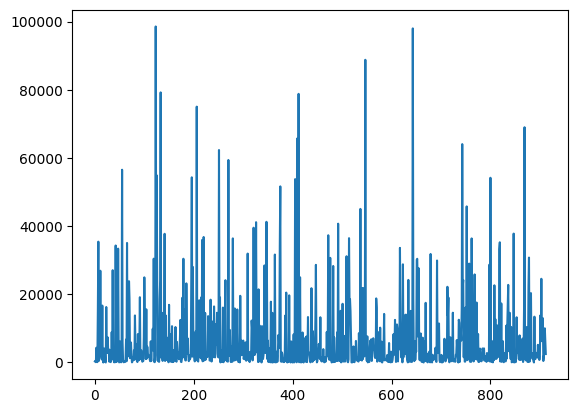

In [24]:
plt.plot(flood['gfd_area'])

## binning

ใช้ histogram ดู bin ที่เหมาะสม

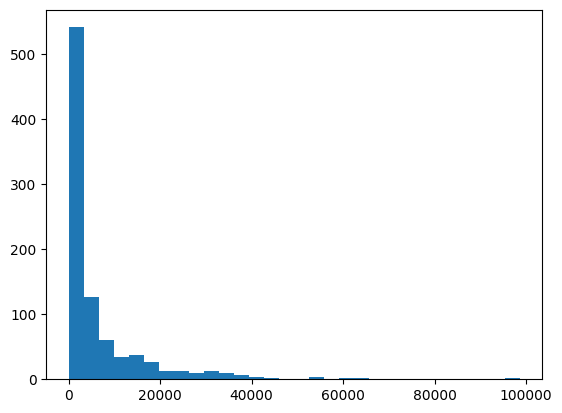

In [25]:
outputhist = plt.hist(flood['gfd_area'],30);

In [26]:
outputhist[1]

array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
       13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
       26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
       39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
       52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
       65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
       78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
       91977.77866667, 95262.69933333, 98547.62      ])

In [27]:
def put_value_into_bins(value,bin_edge):
    new_val = None # Initialize new_val
    for i in range(len(bin_edge)-1):
        if value >= bin_edge[i] and value < bin_edge[i+1]:
            new_val = bin_edge[i] + (bin_edge[i+1] - bin_edge[i])/2
            break # Exit loop once value is binned
    return new_val

In [28]:
put_value_into_bins(3000,outputhist[1])

np.float64(1642.4603333333332)

In [29]:
flood['gfd_area_bin'] = flood['gfd_area'].apply(lambda x: put_value_into_bins(x,outputhist[1]))


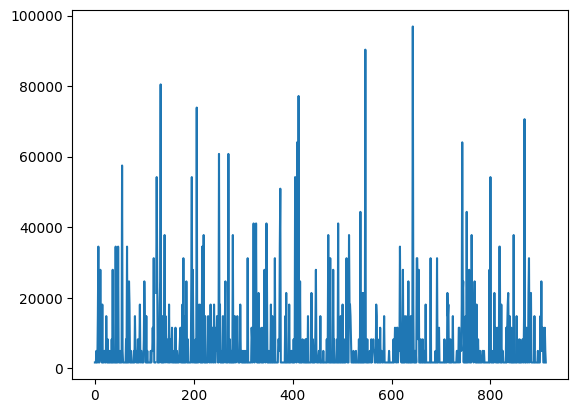

In [30]:
plt.plot(flood['gfd_area_bin'])

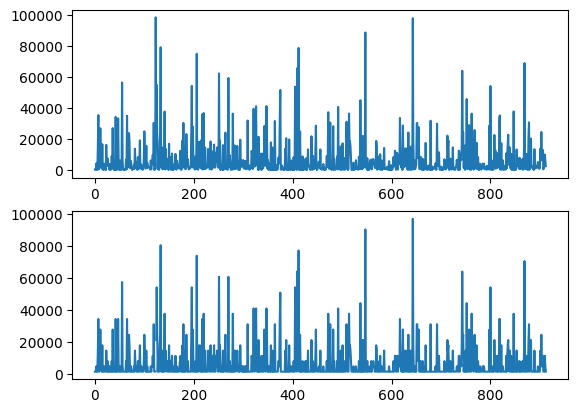

In [31]:
plt.subplot(2,1, 1)
plt.plot(flood['gfd_area'])
plt.subplot(2, 1, 2)
plt.plot(flood['gfd_area_bin'])

data หลังจากที่ทำ binning แล้ว

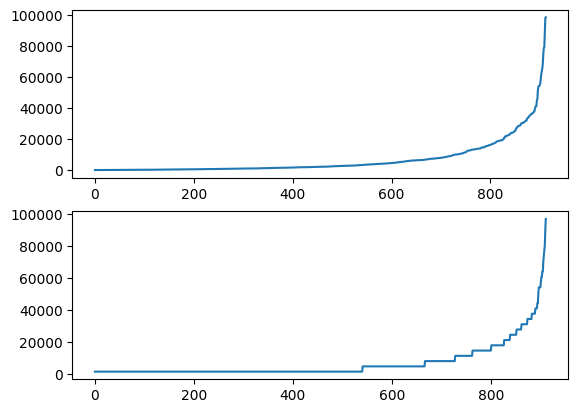

In [32]:
plt.subplot(2,1, 1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2, 1, 2)
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop=True))

## outlier Removal

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcd887eea80>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcd887ef050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcd887ee750>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcd887ef5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcd887ef7a0>],
 'means': []}

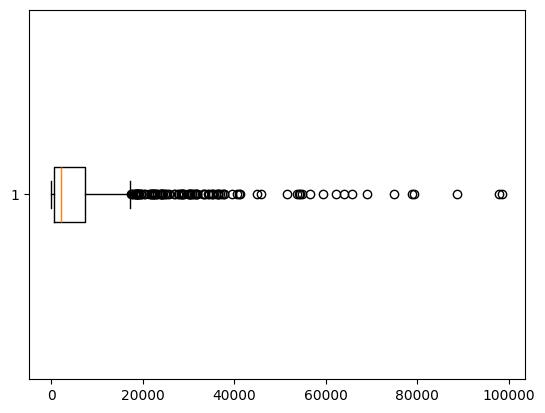

In [33]:
plt.boxplot(flood['gfd_area'],vert=False)

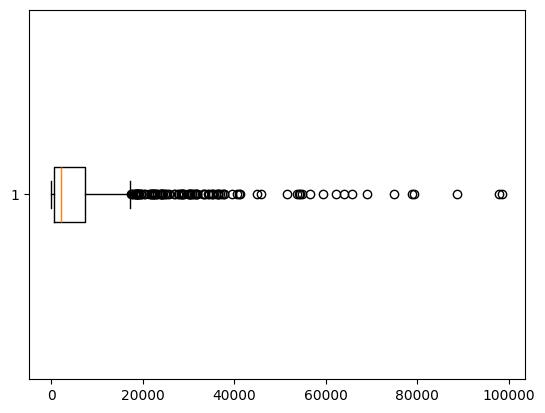

In [34]:
plt.boxplot(flood['gfd_area'],vert=False);

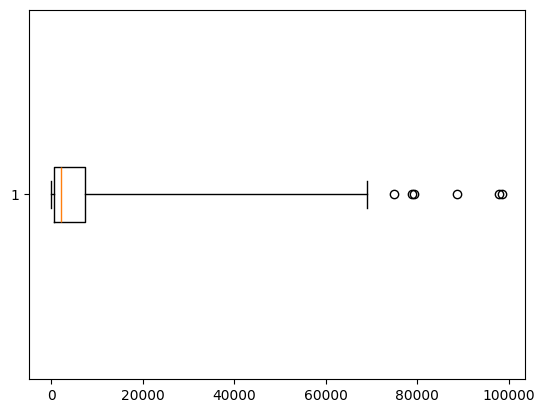

In [35]:
plt.boxplot(flood['gfd_area'],vert=False,whis=10);

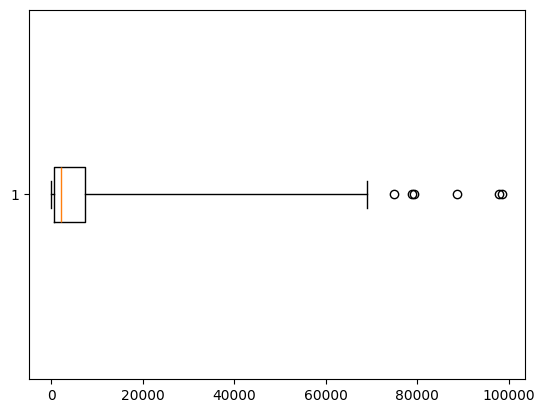

In [36]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10)

In [37]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7bcd887867e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bcd88786e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bcd88786510>],
 'medians': [<matplotlib.lines.Line2D at 0x7bcd887874a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bcd887877a0>],
 'means': []}

In [38]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [39]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [40]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outlier

In [41]:
flood_nooutlier = flood[flood['gfd_area'] <
                        outputbox['whiskers'][1].get_xdata()[1]]

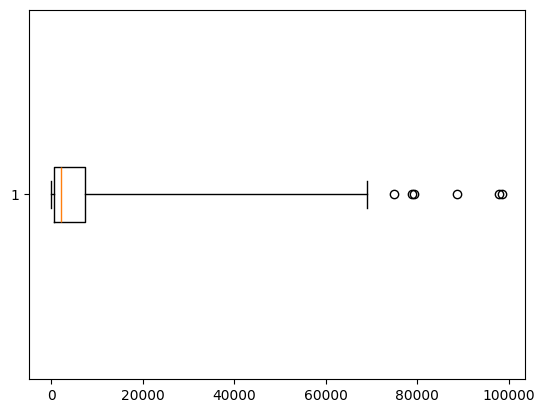

In [42]:
outputbox2 = plt.boxplot(flood['gfd_area'],vert=False,whis=10);

ตามหาค่า outlier

In [43]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,1.0,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,NaN


# Data Integration

Data exploration

In [44]:
project_df = pd.read_csv('/content/drive/MyDrive/data/Copy of opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [45]:
for i in project_df.columns:
    print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [46]:
unit_df = pd.read_csv('/content/drive/MyDrive/data/Copy of opendata_unittype-2.csv')
unit_df .head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


 unit_df บอกแบบบ้าน ไทป์บ้าน รวบรวมมาจะเห็นว่าบางอันจะเป็นคอนโด ห้องต่างๆ

In [47]:
for i in unit_df.columns:
    print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more columns to the table (X-data Integration)


```map()```




In [48]:
#unit_df['project_id'].map(project_df.set_index('project_id') ['name_th','developer_name_th',
#                                                              'neighborhood_name_th','subdistrict_name_th',
 #                                                             'district_name_th','province_name_th'])

In [50]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'])
unit_df['project_id'].map(project_df_dedup.set_index('project_id') ['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


## Deduplication

ดูก่อนว่า data deduplication ยังไง

In [51]:
project_df.duplicated().any()

np.True_

In [52]:
project_df.duplicated().sum()

np.int64(2)

In [53]:
project_df[project_df.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
project_df[project_df.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
project_df.duplicated('project_id', keep=False)

,0
0,True
1,False
2,False
3,False
4,False
...,...
23862,False
23863,True
23864,False
23865,False


In [56]:
project_df[project_df.duplicated()]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'])

# Hw3 กลับไปเติมข้อมูล columns ที่จำเป็นที่เหลือ เข้าไปใน Unit
('developer_name_th', 'neighborhood_name_th','subdistrict_name_th', 'district_name_th','province_name_th')

In [58]:
unit_df['ชื่อบริษัทก่อสร้าง'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['developer_name_th'])

In [59]:
unit_df['ชื่อย่าน'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['neighborhood_name_th'])

In [60]:
unit_df['ชื่อตำบล'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['subdistrict_name_th'])

In [61]:
unit_df['ชื่อเขต/อำเภอ'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['district_name_th'])

In [62]:
unit_df['ชื่อจังหวัด'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['province_name_th'])


In [63]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


In [64]:
unit_df.isnull().sum()

,0
row_number,0
unittype_id,0
project_id,0
name_th,0
propertytype_id,0
propertytype_name_en,0
propertytype_name_th,0
area_total_min_wa,40226
area_usable_min,5235
price_min,8251


## Add more data(Y-data integration)

In [65]:
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


In [66]:
set(unit_df['propertytype_name_th'])

{'คอนโด',
 'ทาวน์โฮม',
 'ที่ดิน',
 'บ้าน',
 'บ้านแฝด',
 'สำนักงาน',
 'อพาตเมนต์',
 'อาคารพาณิชย์',
 'โกดัง / โรงงาน',
 'โรงแรม',
 'โฮมออฟฟิศ'}

สมมติว่า database เก็บแยกชนิดของบ้าน

In [67]:
house = unit_df[unit_df['propertytype_name_th']=='บ้าน']
condo = unit_df[unit_df['propertytype_name_th']=='คอนโด']

In [72]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [69]:
condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3700000.0,...,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4200000.0,...,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3350000.0,...,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15900000.0,...,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4700000.0,...,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


รวมข้อมูล บ้าน และ condo

In [70]:
house_condo = pd.concat([house, condo])
house_condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [71]:
house_condo.shape

(30583, 33)

## Data Transformation

ในกรณีที่ ข้อมูลใน column เดียวกันใช้หน่วยไม่เหมือนกัน
ต้องมีการแปลงข้อมูลก่อน

ทำให้หน่วยของราคา ไม่เท่ากัน (condo หน่วยบาท vs house หน่วยล้านบาท)  

In [75]:
house['price_min'] = house['price_min']/1000000
house

/tmp/ipython-input-3989735810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min']/1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา


ตรวจสอบ scale คร่าวๆ

In [76]:
from matplotlib import pyplot as plt

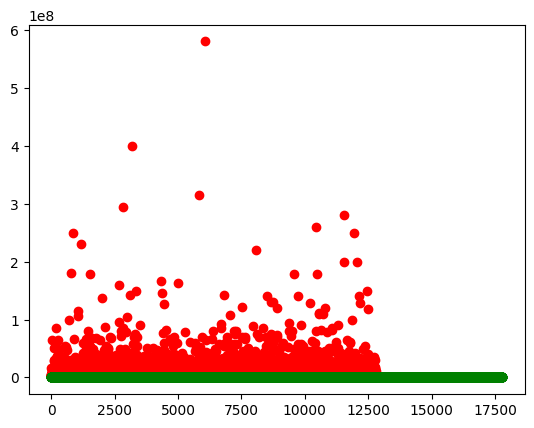

In [78]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c='r')
plt.scatter(range(len(house['price_min'])),house['price_min'],c='g')

แปลงค่า หน่วย ของ คอนโดให้เป็นหลักล้านแล้ว รวม data

/tmp/ipython-input-2032090716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = house['price_min']/1000000


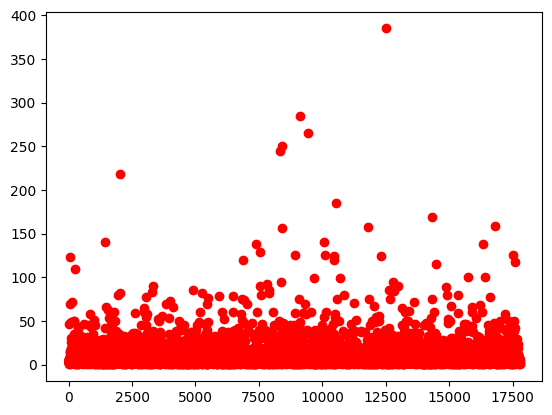

In [80]:
condo['price_min'] = house['price_min']/1000000
condo_house = pd.concat([house, condo])
plt.scatter(range(len(condo_house['price_min'])),condo_house['price_min'],c='r')

In [81]:
condo_house[condo_house['price_min']>300]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
30469,21591,63f6e58e9b028e00130ae6f6,63f6e3b09b028e00130ae6e5,บ้านเดี่ยวสามชั้น,1,Detached House,บ้าน,NaN,2918.0,385.0,...,2023-02-23 11:30:03,2023-02-23 11:05:42,baania,https://baania.com/th/project/อสงไขย-63f6e3b09...,2023-06-11,บริษัท อาเมทัส ดีเวลลอปเม้นท์ จำกัด,เขาพระตำหนัก,หนองปรือ,บางละมุง,ชลบุรี


## Column Alignment

สลับ column ของ data condo

In [88]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'ชื่อบริษัทก่อสร้าง', 'ชื่อย่าน', 'ชื่อตำบล', 'ชื่อเขต/อำเภอ',
       'ชื่อจังหวัด'],
      dtype='object')

In [90]:
columns_titles = ['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'ชื่อบริษัทก่อสร้าง', 'ชื่อย่าน', 'ชื่อตำบล', 'ชื่อเขต/อำเภอ',
       'ชื่อจังหวัด']
condo_swap = condo.reindex(columns=columns_titles)

In [91]:
condo_swap.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,NaN,...,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,NaN,...,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,NaN,...,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,NaN,...,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,NaN,...,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [92]:
condo_swap['price_min_baht'] = condo_swap['price_min']*1000000

In [94]:
condo_swap.shape

(12806, 34)

In [95]:
house.shape

(17777, 33)

In [96]:
pd.concat([condo_swap, house])

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด,price_min_baht
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,NaN,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร,NaN
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,NaN,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร,NaN
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,NaN,...,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร,NaN
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,NaN,...,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร,NaN
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,NaN,...,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.00,3.2000,...,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี,NaN
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.00,3.8614,...,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น,NaN
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.00,5.3900,...,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี,NaN
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา,NaN


## Add data Source Column

เตรียมปัญหาโดย การลบ column property type ออก

In [97]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_created,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [99]:
house = house.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])
condo = condo.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])

In [102]:
house['data_source'] = 'house'
condo['data_source'] = 'condo'
combines = pd.concat([house,condo])

In [103]:
combines.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,date_updated,source,url_unittype,day,ชื่อบริษัทก่อสร้าง,ชื่อย่าน,ชื่อตำบล,ชื่อเขต/อำเภอ,ชื่อจังหวัด,data_source
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,house


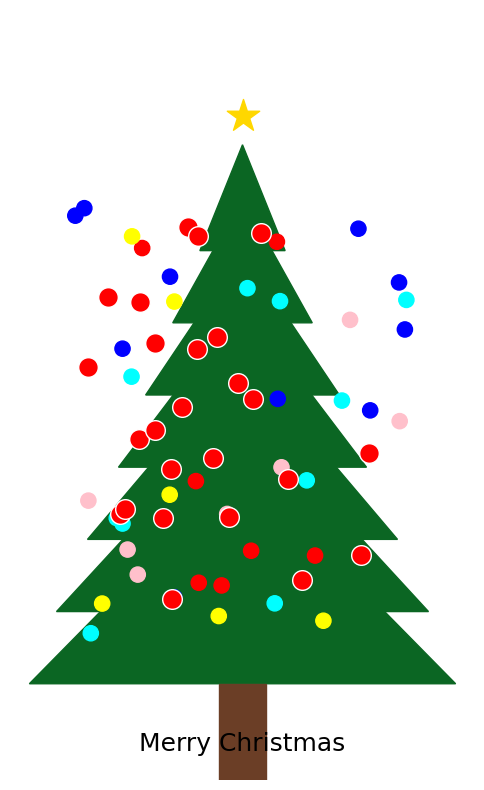

In [87]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 10))
ax.set_xlim(-6, 6)
ax.set_ylim(-2, 14)
ax.axis('off')

# ===== ฟังก์ชันวาดชั้นต้นไม้ =====
def tree_layer(center, bottom, width, height, color):
    x = [center - width, center, center + width]
    y = [bottom, bottom + height, bottom]
    ax.fill(x, y, color=color)

# ===== วาดต้นคริสต์มาส (หลายชั้น) =====
layers = [
    (0, 0, 5.5, 4.5),
    (0, 1.5, 4.8, 4.2),
    (0, 3.0, 4.0, 3.8),
    (0, 4.5, 3.2, 3.4),
    (0, 6.0, 2.5, 3.0),
    (0, 7.5, 1.8, 2.6),
    (0, 9.0, 1.1, 2.2),
]

for c, b, w, h in layers:
    tree_layer(c, b, w, h, '#0b6623')

# ===== ลำต้น =====
ax.fill([-0.6, -0.6, 0.6, 0.6], [-2, 0, 0, -2], color='#6b3e26')

# ===== ดาวบนยอด =====
ax.scatter(0, 11.8, s=600, marker='*', color='gold')

# ===== ไฟประดับ =====
np.random.seed(42)
light_x = np.random.uniform(-4.5, 4.5, 40)
light_y = np.random.uniform(1, 10, 40)
light_colors = ['red', 'yellow', 'blue', 'pink', 'cyan']
ax.scatter(light_x, light_y, s=120, c=np.random.choice(light_colors, 40))

# ===== ลูกบอล =====
orn_x = np.random.uniform(-4, 4, 25)
orn_y = np.random.uniform(1.5, 9.5, 25)
ax.scatter(orn_x, orn_y, s=200, color='red', edgecolors='white')

# ===== ข้อความ =====
ax.text(0, -1.4, " Merry Christmas ", fontsize=18, ha='center')

plt.show()
